In [1]:
# Libraries at the top
# Display graphs immediately
%matplotlib inline
import numpy as np                   # Math functions
import matplotlib.pyplot as plt      # Plotting functions
import scipy.stats as st             # Common distributions
import pandas as pd                  # For handaling data
from IPython.display import display  # Display complex objects

In [2]:
# Convert data from a file to a big list
capacitor_data = (pd.read_csv("DataFile.csv")
                    .as_matrix().flatten())
capacitor_data

array([ 97. ,  92.7,  94.5, ...,  93.4,  95.5,  97.4])

In [3]:
# Set bin size for histogram
bin_width = 0.2;
cmin = capacitor_data.min();
cmax = capacitor_data.max();
# Create a list of each bin location
# The bin location is the smallest number it contains.
bins = np.arange(cmin, cmax, bin_width)

In [4]:
# Find the bin centers by averaging adjascent bins
# 0.5 * ([0, 1, ..., N -1] + [1, 2, ..., N])
bin_centers = 0.5 * (bins[:-1] + bins[1:])

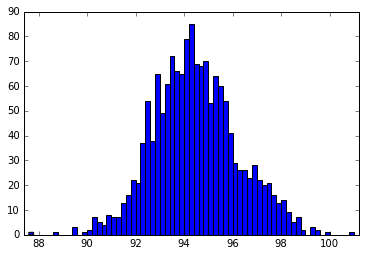

In [5]:
# Get figure objects to keep and work on
fig, ax = plt.subplots();
ax.set_xlim((cmin - bin_width, cmax + bin_width));
ax.hist(capacitor_data, bins=bins);

In [6]:
# Find some statistical parameters
N = len(capacitor_data)
mu = np.mean(capacitor_data)
variance = np.var(capacitor_data)

In [7]:
# Print the variance to two decimal places
'variance is {0:.2f}'.format(variance)

'variance is 3.02'

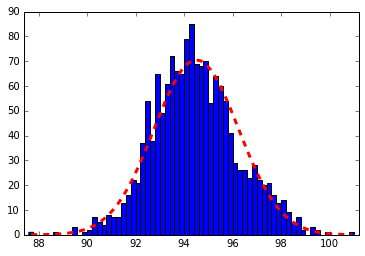

In [8]:
# Add fitting
area = N * bin_width
std = np.sqrt(variance)
fit = area * st.norm(loc=mu, scale=std).pdf(bin_centers)
ax.plot(bin_centers, fit, 'r--', linewidth=3);
display(fig)